In [8]:
f = open(r".\crawling_data\preprocessed_essay.csv",'r', encoding='utf-8')
essays = f.readlines()
f.close()

In [9]:
n_min = 4                                                            
good_corpus = []
for essay in essays[:22]:
    pre = nltk.word_tokenize(essay)
    pre = [x for x in pre if len(x) >= n_min]                       
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]
    good_corpus += pre                                                  

In [10]:
n_min = 4                                                            
bad_corpus = []
for essay in essays[-16:]:
    pre = nltk.word_tokenize(essay)
    pre = [x for x in pre if len(x) >= n_min]                       .
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]
    bad_corpus += pre                                                   

In [11]:
my_good_series = pd.Series(good_corpus)
my_bad_series = pd.Series(bad_corpus)

In [12]:
my_good_word_counts = my_good_series.value_counts().sort_values(ascending=False)
my_good_word_counts[:25]

data           87
time           85
team           83
project        82
able           59
people         57
using          56
experience     56
also           51
development    51
thought        44
think          43
design         42
program        41
company        40
based          40
game           40
games          40
first          39
problem        39
members        38
technology     38
service        37
developed      37
like           36
dtype: int64

In [13]:
my_bad_word_counts = my_bad_series.value_counts().sort_values(ascending=False)
my_bad_word_counts[:25]

project        75
development    67
technology     63
team           63
system         57
design         50
experience     49
able           46
first          44
computer       42
using          42
school         42
safety         40
software       40
graduate       40
work           39
data           39
think          38
application    36
related        36
information    35
knowledge      35
korea          35
management     34
company        33
dtype: int64

In [15]:
a_long_sentence = ' '.join(good_corpus)

In [ ]:
wc = WordCloud(background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)

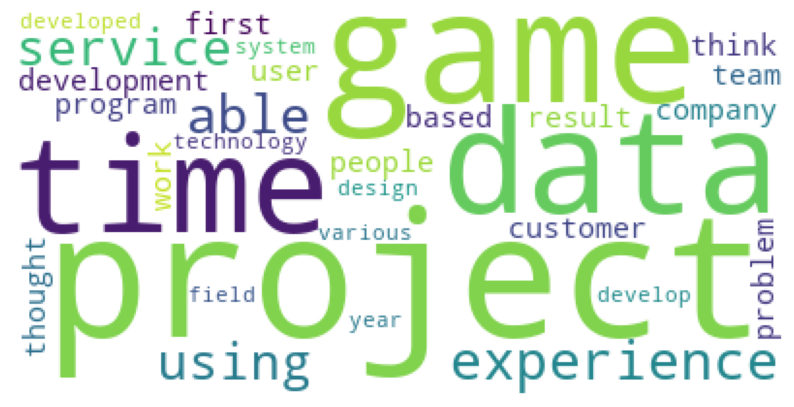

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")                                  
plt.show()

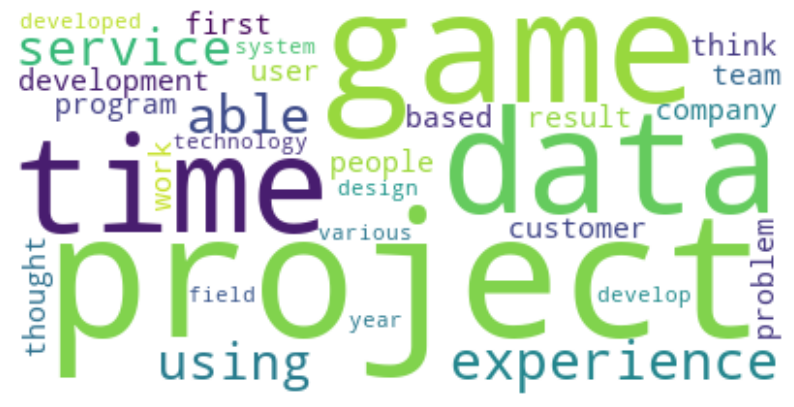

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                   
plt.show()

In [43]:
from tabulate import tabulate

df_1_point = my_bad_word_counts[:25].reset_index()
df_1_point.columns = ['단어', '빈도수']
df_1_point['출처'] = '1점'

df_5_point = my_good_word_counts[:25].reset_index()
df_5_point.columns = ['단어', '빈도수']
df_5_point['출처'] = '5점'

# 두 DataFrame 병합
df_combined = pd.concat([df_1_point, df_5_point])

# 피벗 테이블 생성
df_pivot = df_combined.pivot_table(index='빈도수', columns='출처', values='단어', aggfunc='first').reset_index()

# 컬럼명 변경
df_pivot.columns.name = None
df_pivot.columns = ['빈도수', '1점_자소서', '5점_자소서']

# NaN 값을 빈 문자열로 대체
df_pivot = df_pivot.fillna('')

# 빈도수 기준으로 정렬
df_pivot = df_pivot.sort_values(by='빈도수', ascending=False).reset_index(drop=True)

# tabulate를 사용하여 출력
print(tabulate(df_pivot, headers='keys', tablefmt='grid', showindex=False))


+----------+--------------+--------------+
|   빈도수 | 1점_자소서   | 5점_자소서   |
+==========+==============+==============+
|       87 |              | data         |
+----------+--------------+--------------+
|       85 |              | time         |
+----------+--------------+--------------+
|       83 |              | team         |
+----------+--------------+--------------+
|       82 |              | project      |
+----------+--------------+--------------+
|       75 | project      |              |
+----------+--------------+--------------+
|       67 | development  |              |
+----------+--------------+--------------+
|       63 | technology   |              |
+----------+--------------+--------------+
|       59 |              | able         |
+----------+--------------+--------------+
|       57 | system       | people       |
+----------+--------------+--------------+
|       56 |              | using        |
+----------+--------------+--------------+
|       51 |          